# Perceptron Implementation in Logic Gates

In this project, I've used building blocks of *Neural Network: perceptrons* to model the fundamental building blocks of computers — logic gates.

1. AND gate - The table below shows the results of an AND gate. Given two inputs, an AND gate will output a 1 only if both inputs are a 1.
2. XOR gate — a gate that outputs a 1 only if one of the inputs is a 1.

Goals:

- AND gate can be thought of as **linearly separable** data and *Perceptron* can be trained to perform AND.
- XOR gate isn’t **linearly separable** and a *Perceptron* fails to learn XOR.


<img align="center" alt="Profile" width="502px" src="logic.PNG">

In [20]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

## Creation of AND Data

In [21]:
data1 = [[0, 0], 
         [0, 1], 
         [1, 0], 
         [1, 1]]


labels1 = [0, 
           0, 
           0, 
           1]

## Visualization of AND Data

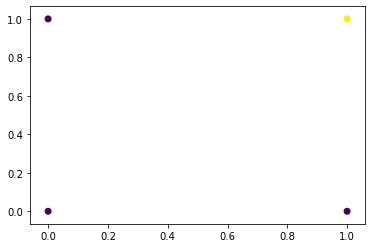

In [22]:
plt.scatter(x = [point[0] for point in data1], 
            y = [point[1] for point in data1], 
            c = labels1)

plt.show()

### This data is Linearly Separable indeed.

## Building Perceptron

Now that I have set **AND** data, I've build a perceptron to learn AND. The default iteration is 1000. I've cut the training pretty short to see if the algorithm learns **AND** even with very little training.

In [23]:
classifier1 = Perceptron(max_iter = 40)
classifier1.fit(data1, labels1)

print(classifier1.score(data1, labels1))

1.0


#### Perfectly Scored 100% !

## Visualizing the Perceptron

The perceptron has been trained correctly with AND gate, but let’s try to visualize what decision boundary it is making.

In [24]:
print(classifier1.decision_function([[0,0], 
                                     [1,1], 
                                     [0.5, 0.5]]))

[-2.  2.  0.]


In [25]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

In [34]:
# Finding Every possible combination of (x, y)

point_grid = list(product(x_values, y_values))


# Distance of those points from Decision boundary
distances = classifier1.decision_function(point_grid)
abs_distance = [abs(dist) for dist in distances]


# Reshaping the Distances as scaler 2D array
distance_matrix = np.reshape(abs_distance, (100,100))
print(distance_matrix)

[[2.         1.97979798 1.95959596 ... 0.04040404 0.02020202 0.        ]
 [1.97979798 1.95959596 1.93939394 ... 0.02020202 0.         0.02020202]
 [1.95959596 1.93939394 1.91919192 ... 0.         0.02020202 0.04040404]
 ...
 [0.04040404 0.02020202 0.         ... 1.91919192 1.93939394 1.95959596]
 [0.02020202 0.         0.02020202 ... 1.93939394 1.95959596 1.97979798]
 [0.         0.02020202 0.04040404 ... 1.95959596 1.97979798 2.        ]]


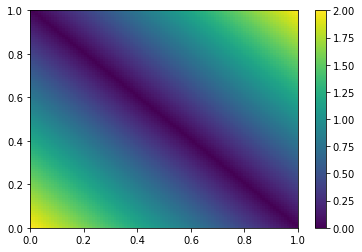

In [26]:
heatmap = plt.pcolormesh(x_values, 
                         y_values, 
                         distance_matrix)

plt.colorbar(heatmap)


plt.show()

#### A great visualization of what the *Perceptron* is doing. The purple line where the distances are 0, that’s the decision boundary!

## Creation of XOR Data Model

In [27]:
data = [[0, 0], 
        [0, 1], 
        [1, 0], 
        [1, 1]]

labels = [0, 
          1, 
          1, 
          0]



classifier = Perceptron(max_iter = 40)
classifier.fit(data, labels)
print(classifier.score(data, labels))

0.5


#### Only Scored 50% !

## Visualization of XOR Decision Boundary

In [28]:
print(classifier.decision_function([[0,0], 
                                    [1,1], 
                                    [0.5, 0.5]]))

[0. 0. 0.]


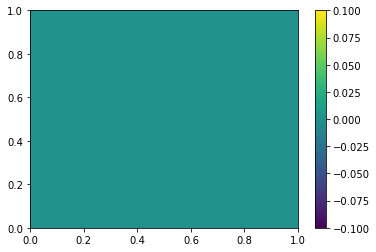

In [29]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)


point_grid = list(product(x_values, y_values))

distances = classifier.decision_function(point_grid)
abs_distance = [abs(dist) for dist in distances]



distance_matrix = np.reshape(abs_distance, (100,100))


heatmap = plt.pcolormesh(x_values, 
                         y_values, 
                         distance_matrix)

plt.colorbar(heatmap)


plt.show()

#### Perceptrons can’t solve problems that aren’t linearly separable. There is no visible Decsion Boundary

## Creation of OR Data Model

In [30]:
data = [[0, 0], 
        [0, 1], 
        [1, 0], 
        [1, 1]]

labels = [0, 
          1, 
          1, 
          1]



classifier = Perceptron(max_iter = 40)
classifier.fit(data, labels)

print(classifier.score(data, labels))

1.0


#### Perfectly Scored 100% !

## Visualization of OR Decision Boundary

In [31]:
print(classifier.decision_function([[0,0], 
                                    [1,1], 
                                    [0.5, 0.5]]))

[-1.  3.  1.]


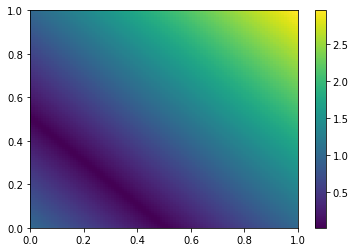

In [32]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)


point_grid = list(product(x_values, y_values))

distances = classifier.decision_function(point_grid)
abs_distance = [abs(dist) for dist in distances]



distance_matrix = np.reshape(abs_distance, (100,100))


heatmap = plt.pcolormesh(x_values, 
                         y_values, 
                         distance_matrix)

plt.colorbar(heatmap)


plt.show()

#### A great visualization of what the *Perceptron* is doing. The purple line where the distances are 0, that’s the decision boundary for OR gate! 